# MSDS 430 Module 6 Python Assignment Solutions - Steve Desilets

<div class="alert alert-block alert-warning"><b>In this assignment you will read through the notebook and complete the exercises. Once you are satisfied with the results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</b></div>

<div class="alert alert-block alert-info"> 
    <b>Research project problem statement (continued from Module 5):</b>  
    
There are world happiness surveys conducted every year for many countries around the world. Happiness is measured on such subjective topics as social support, freedom, generosity, corruption, government trust, positive and negative affects.
<br>
    
This study will look at the happiness measures over multiple years to determine which of the measures are related to the overall happiness of a country.  And we will look at population of a country to see if this has any relationship to the happiness measures. Are larger countries based on population happier than smaller countries?<br><br>
    
<b>Objectives:</b>

- Read the clean file from Module 5 into a dataframe
- Use Seaborn pairplots to investigate each field closer and to inspect the relationships between fields
- Use a correlation matrix to look for relationships amoung variables
- Create new column in dataframe
- Learn how to handle a skewed variable
- Subset data by rows (certain years, certain countries)
- Subset data by columns (only include some columns in a new dataframe)
- Learn various ways to plot data using Seaborn and Plotly
- Create derived variables to add to the dataframe
- use dictionary and map to create new field
- seaborn pairplot (with hue)
- groupby with aggregators
- rankings and groupings

</div>

### References:

__[World Happiness Report](https://worldhappiness.report/ed/2022/#appendices-and-data)__

How the indices are calculated for each country: __[World Happiness FAQ](https://worldhappiness.report/faq/)__

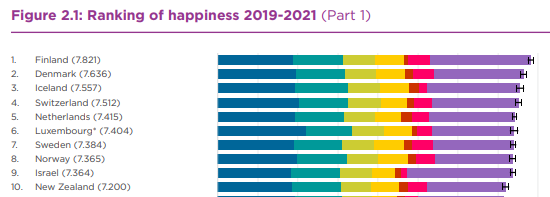

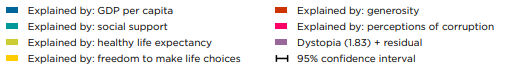

<div class="alert alert-block alert-danger"><b>Reminder: In all of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

In [5]:
# if you have not used plotly before, uncomment this cell and run once

# pip install plotly

SyntaxError: invalid syntax (1864297331.py, line 3)

In [6]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

### Change Dtype upon reading in file

If you go back and look at the Module 5 code, `Year` was saved as type `object`, but below it is read in by default as an `int64`. The `Year` column will not be used for mathematical operations in our analysis, but instead will be used as a label in plots and is better served as an `object`.  We could convert the variable after the pandas read or we can convert is as we read in the data.

In [7]:
# read in happiness scores
#merged = pd.read_csv('Happiness_clean.csv') # will read in Year as int64

merged = pd.read_csv('Happiness_clean.csv', dtype = {'Year': str})
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                566 non-null    object 
 1   Year                   566 non-null    object 
 2   Life Ladder            566 non-null    float64
 3   Log GDP                566 non-null    float64
 4   Social support         566 non-null    float64
 5   Life Expectancy        566 non-null    float64
 6   Choice Freedom         566 non-null    float64
 7   Generosity             566 non-null    float64
 8   Corruption             566 non-null    float64
 9   Positive affect        566 non-null    float64
 10  Negative affect        566 non-null    float64
 11  Government confidence  566 non-null    float64
 12  Population             566 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 57.6+ KB


Country  Year  Life Ladder   Log GDP  Social support  Life Expectancy  \
0  Afghanistan  2015     3.982855  7.634466        0.528597        52.599998   
1  Afghanistan  2016     4.220169  7.629037        0.559072        52.924999   
2  Afghanistan  2017     2.661718  7.629684        0.490880        53.250000   
3  Afghanistan  2018     2.694303  7.617663        0.507516        53.575001   
4  Afghanistan  2019     2.375092  7.632903        0.419973        53.900002   

   Choice Freedom  Generosity  Corruption  Positive affect  Negative affect  \
0        0.388928    0.085082    0.880638         0.491410         0.339276   
1        0.522566    0.047488    0.793246         0.501409         0.348332   
2        0.427011   -0.116068    0.954393         0.435270         0.371326   
3        0.373536   -0.088125    0.927606         0.384561         0.404904   
4        0.393656   -0.103467    0.923849         0.324108         0.502474   

   Government confidence  Population  
0               0.260557    34413603  
1               0.324990    35383028  
2               0.261179    36296111  
3               0.364666    37171922  
4               0.341482    38041757

### Seaborn pairplots

__[Seaborn pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html)__

The Seaborn pairplot will show a histogram of each variable and a scatterplot of each combination of variables. These views allow you to see the distribution of each individual field and also how each field interacts with the other fields.

In the example below, we are showing `Life Ladder`, `Log GDP` and `Corruption`.  There are a few things of note in the plots:
- There is a positive relationship between Log GDP and Life Ladder which means that as Log GDP increases, so does the Life Ladder score.
- There are two plots with negative leaning relationships: Corruption v. Life Ladder and Corruption v. Log GDP. A negative relationship in these cases indicates that as Corruption increases, Life Ladder (and LogGDP) decreases.
- Corruption is skewed left which means it has a negative skew.

['Life Ladder', 'Log GDP', 'Corruption']

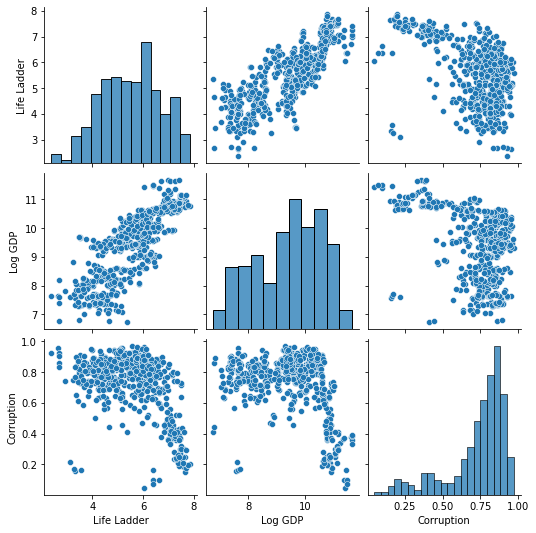

In [8]:
# pairplots on three fields
columns = ['Life Ladder','Log GDP','Corruption']
columns
sns.pairplot(merged[columns])

### Skewed data

- **Negative skew (aka left skewed)**: the left tail is longer and the mass of the distribution is on the right of plot which results in a right leaning curve.
- **Positive skew (aka right skewed)**: the right tail is longer and the mass of the distribution is on the left of the plot which results in a left leaning curve.
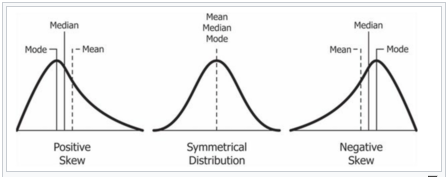
Source: __[What is Skewness?](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)__

In [9]:
import scipy
from scipy.stats import skew

print(skew(merged['Corruption'], axis = 0, bias = True))
merged['Corruption'].skew()

-1.45433598779675


-1.4582033326732935

### Handling skewed data

Data is considered to be skewed when the skew value is +3 or -3.  Even though `Corruption` only has a skew of -1.45, below is sample code of testing out two functions to normalize the data - Numpy's `log` and `square` function.

- `log` is typically used for postively skewed data
- `square` is typically used for negatively skewed data
- Note that there are other alternatives for normalizing data beyond log and square

In [10]:
# testing out log on negatively skewed data and it did not improve the skew
print('------- before log --------------')
merged['Corruption'].skew()
test = np.log(merged['Corruption'])
print('------- after log ---------------')
test.skew()
#test

------- before log --------------


-1.4582033326732935

------- after log ---------------


-2.6417261913936647

Using numpy's `log` function did not improve the skew value. In fact, the negative skew got further to the left from 0. As you can see with the `square` function, the skew value improved and got closer to 0.

In [11]:
# testing out square on negatively skewed data and it did improve skew
print('------- before square --------------')
merged['Corruption'].skew()
print('------- after square ---------------')
test = np.square(merged['Corruption'])
test.skew()
#test

------- before square --------------


-1.4582033326732935

------- after square ---------------


-0.8623948258485358

If you wanted to add the adjusted field to your data, you could use code like what is shown below.

In [12]:
'''
merged['Corruption'].skew()
merged['Corruption_skew'] = np.square(merged['Corruption'])
merged['Corruption_skew'].skew()
'''

"\nmerged['Corruption'].skew()\nmerged['Corruption_skew'] = np.square(merged['Corruption'])\nmerged['Corruption_skew'].skew()\n"

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>: Create a Seaborn pairplot with the following fields:

- Life expectancy
- Log GDP
- Corruption
- Social support
- Choice Freedom
- Generosity
- Population
</div>

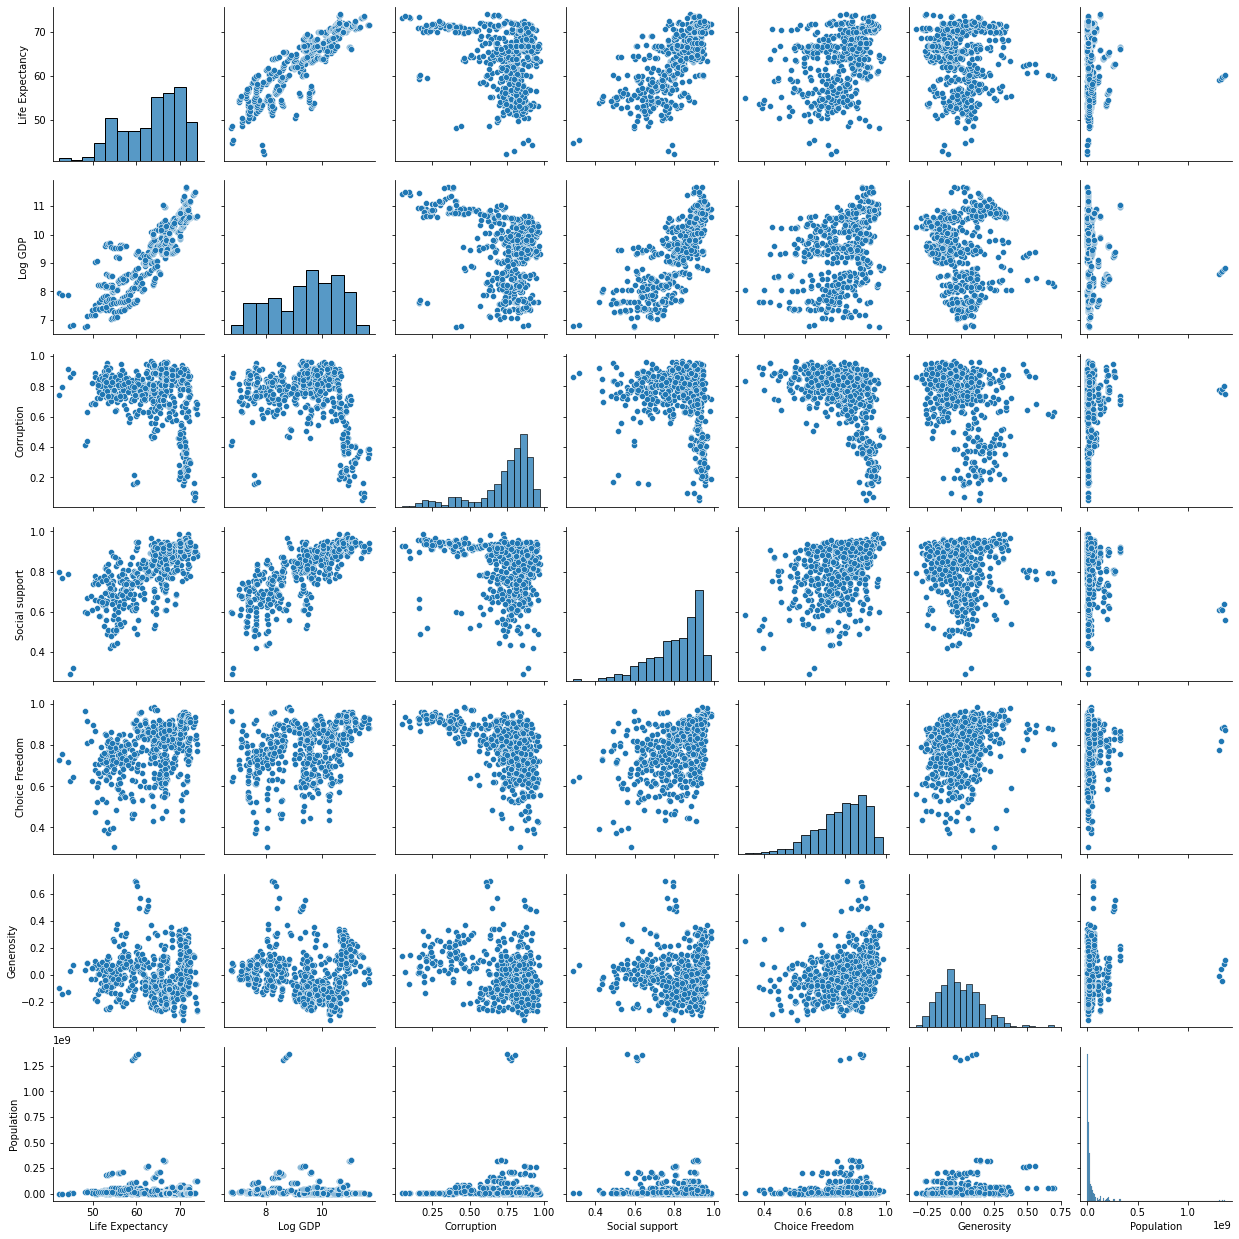

In [14]:
#TODO create pairplot
question_1_columns = ['Life Expectancy', 'Log GDP', 'Corruption', 'Social support', 'Choice Freedom', 'Generosity', 'Population']
sns.pairplot(merged[question_1_columns])

<div class="alert alert-block alert-success"><b>Problem 2 (2 pts.)</b>: Use a markdown cell to answer the following questions regarding the pairplots:

1. Explain the correlation between Log GDP and Life Expectancy based on the corresponding pairplot.
2. Explain how you would investigate what appear to be outliers in the Population pairplots.
</div>

According to the above Seaborn pairplot, Log GDP (per capita) and life expectancy appear to be positively correlated.  This finding makes intuitive sense because when societies have higher average log GDP per capita, then citizens (on average) can afford goods and services that will increase their life expectancy (like healthy food and healthcare).

If I wanted to explore the outliers in the population pairplot, then I would first create a boxplot of the population variable to get a better view of the data and to observe whether these datapoints would appear as outliers in a boxplot as well.  Then, after determining approximately how many points are outliers via the boxplot, I would sort the dataset by the population variable and print out the appropriate number of rows from the top of the dataset.  I would examine these rows of data to determine whether the data appears to be valid or incorrect.  If the data appears to be valid, then I would keep the data in the dataset.  If the data appears to be invalid, then I would first see whether there would be any ways to fix the data (i.e. by replacing the existing data with more accurate figures).  If the data were incorrect and if there were no way to fix the data, then I would remove the observations from my dataset.

<div class="alert alert-block alert-success"><b>Problem 3 (3 pts.)</b>: Complete the following tasks:

1. Display the skew value for `population`.
2. What is the skew value after a `log` transformation?
3. What is the skew value after a `square` transformation?
</div>

In [16]:
#TODO: Display the population skew
population_skew = merged['Population'].skew() 
print(f"The skew of the population variable is {population_skew}.")

#TODO: Determine the skew value after a log transformation
log_population_skew = np.log(merged['Population']).skew()
print(f"The skew of the log transformation of the population variable is {log_population_skew}.")

#TODO: Display the skew value after a square transformation
squared_population_skew = np.square(merged['Population']).skew()
print(f"The skew of the square transformation of the population variable is {squared_population_skew}.")
    

The skew of the population variable is 8.240502283953434.
The skew of the log transformation of the population variable is 0.21209135405245697.
The skew of the square transformation of the population variable is 10.437569931592455.


### Correlation

We will create a correlation matrix and Seaborn heatmap to investigate how happiness measures and population are related, if at all.  More information on creating a heatmap using Seaborn can be found here:
__[Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__

What does the correlation matrix tell us? 
- There is a strong positive relationship (.803) between `Log GDP` and `Life Ladder` which suggests that those countries with a strong GDP have citizens with a better life.
- There is a moderate negative correlation (-.476) between `Corruption` and `Life Ladder` which suggests the less corruption, the better for a country.
- There is a negative correlation (-.374) between `Corruption` and `Log GDP` which suggests that the less corruption, the better the GDP.
- When you look back at the sample pairplots, they visually support these findings

Life Ladder   Log GDP  Corruption
Life Ladder     1.000000  0.803193   -0.476317
Log GDP         0.803193  1.000000   -0.374004
Corruption     -0.476317 -0.374004    1.000000

<AxesSubplot:>

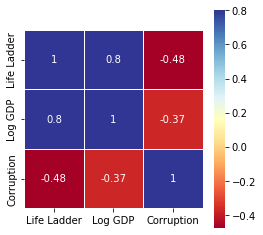

In [17]:
# set up files for correlations
columns = ['Life Ladder','Log GDP', 'Corruption']
df_corr = merged[columns]

# creates a correlation matrix
corrmat = df_corr.corr()
corrmat

# heatmap of correlation matrix
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 )

<div class="alert alert-block alert-success"><b>Problem 4 (3 pts.)</b>: Create a correlation matrix using the Seaborn heatmap and include all numerics in the dataframe starting at `Life Ladder` and ending at `Population`. The heatmap should include eleven variables and use a different color combination than the one above. 
    
__[Colormap Reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)__</div>

<AxesSubplot:>

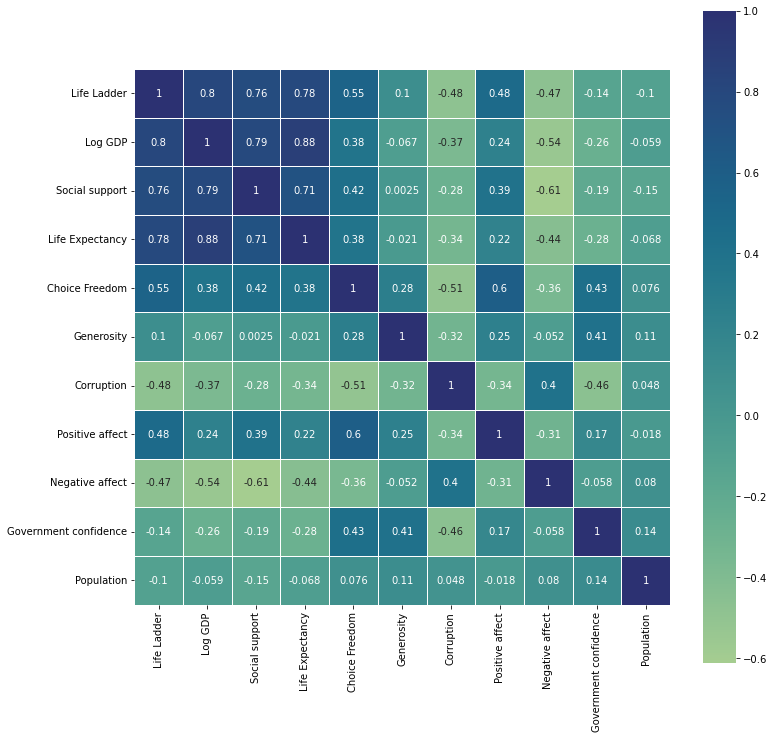

In [19]:
# TODO: Create a heat map using all eleven numeric variables and use a new color combination.
 
columns_q4 = ['Life Ladder','Log GDP', 'Social support', 'Life Expectancy', 'Choice Freedom', 'Generosity', 'Corruption', 'Positive affect', 'Negative affect', 'Government confidence', 'Population']
df_corr_q4 = merged[columns_q4]
corrmat_q4 = df_corr_q4.corr()
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat_q4, square = True, annot = True, cmap="crest", linewidths = .5 )

<div class="alert alert-block alert-success"><b>Problem 5 (2 pts.)</b>:
    
Use a markdown cell to answer the following questions regarding the heatmap:
1. One of the research questions was to understand the relationship between population and happiness. What does the correlation matrix tell you about this relationship?
2. Another question we wanted to answer was the relationship between life expectancy and happiness. What does the correlation matrix tell you about this relationship?
</div>

The correlation heatmap indicates that the correlation of population and the other 10 indicators of happiness range from -0.15 to 0.14.  Given that population appears to have close to zero correlation with each of the happiness indicators, we can deduce that population does not seem to have a strong relationship with indicators of happiness.  (That said, though, I would want to more closely inspect whether the datapoints with high leverage for population are valid data entries before coming to a final conclusion about the relationship between population and indicators of happiness).

Life expectancy appears to have strong positive correlations with some of the indicators of happiness (such as life ladder, log GDP per capita, and social support).  Furthermore, life expectancy appears to have medium-strength correlation with other indicators of happiness (like choice freedom) and medium-strength negative correlations with some negative indicators of happiness (like corruption and negative affect).  Given these multitude of these high correlations between life expectancy and happiness indicators, we can deduce that life expectancy has relationships with many indicators of happiness.


### Subset data to look at one country

One way to investigate data is to pull a smaller subset of data so that it is easy to inspect each row and column.

In [20]:
fin = merged[merged['Country'] == 'Finland']
fin

Country  Year  Life Ladder    Log GDP  Social support  Life Expectancy  \
169  Finland  2015     7.447926  10.716029        0.947801        70.699997   
170  Finland  2016     7.659843  10.740882        0.953940        70.775002   
171  Finland  2017     7.788252  10.769960        0.963826        70.849998   
172  Finland  2018     7.858107  10.779988        0.962155        70.925003   
173  Finland  2019     7.780348  10.792235        0.937416        71.000000   

     Choice Freedom  Generosity  Corruption  Positive affect  Negative affect  \
169        0.929862    0.108773    0.223370         0.736426         0.191058   
170        0.948372   -0.029360    0.249660         0.768806         0.181998   
171        0.962199   -0.004811    0.192413         0.755858         0.176066   
172        0.937807   -0.129722    0.198605         0.748826         0.181781   
173        0.947617   -0.054119    0.195338         0.732282         0.180733   

     Government confidence  Population  
169               0.557600     5479531  
170               0.485727     5495303  
171               0.597539     5508214  
172               0.555102     5515525  
173               0.639188     5521606

### Subset data to look at one year

The heatmap allows us to see which variables have the highest values within the top 20 countries based on `Life Ladder` scores for 2015.


In [21]:
# 2015 only data
year2015 = merged[merged['Year'] == '2015']

# top 20 of 2015 based on life ladder
t2015 = year2015.sort_values(by = ['Life Ladder'], ascending = False)[:20]
t2015.style.background_gradient(cmap = 'Greens')


### Results of heatmap of top 20 for 2015 based on Life Ladder

- For the top 20, the most consistent four categories with the highest scores are Choice Freedom, Life Expectancy, Social Support and Generosity.  Corruption has lower values.
- Interesting to note that the top 20 do not include many of the large populated countries.


<div class="alert alert-block alert-success"><b>Problem 6 (2 pts.)</b>:
    
Create a new heatmap for one country:
1. Create a new data object that only contains data for any country of your choosing.
2. Show a heatmap of all years for the country sorted on the Year value.  Consider using a different color for your heatmap.

</div>

In [22]:
#TODO: Isolate one country - your choice of country
Italy_data = merged[merged['Country'] == 'Italy']
    
#TODO: Create a heatmap of your country with all measures
Italy_data_sorted = Italy_data.sort_values(by = ['Year'], ascending = True)
Italy_data_sorted.style.background_gradient(cmap = 'YlOrRd')


### Plotting using Seaborn and Plotly

In the example below, we are selecting a subset of columns from 2015 with four columns - `Country`, `Life Ladder`, `Log GDP` and `Social support`.  Note that we created two files, one for the bottom of 2015 based on `Life Ladder` and one for all of 2015. We will use these files for plotting examples.


In [23]:
# isolate four fields for the bottom 20 of 2015
b2015 = year2015.sort_values(by = ['Life Ladder'], ascending = True)[:20]

subset2015b = b2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]
# isolate four fields for all of 2015
subset2015all = year2015[['Country', 'Life Ladder', 'Log GDP', 'Social support']]

### Seaborn styles

You can change the style of your plots, but once you set the style, it is set for the whole notebook whenever you use Seaborn.

In [24]:
# seaborn styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Stacked barchart

This stacked barchart below is using the data from the bottom 20 countries for 2015.

__[Stacked Bar Plot](https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/)__

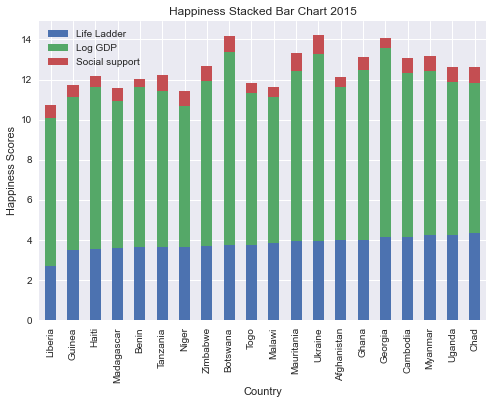

In [25]:
# example using the seaborn style
plt.style.use('seaborn')
subset2015b.plot(x = 'Country', kind = 'bar', stacked = True, title = 'Happiness Stacked Bar Chart 2015',
                ylabel = 'Happiness Scores')
ax.legend
plt.show();

### Horizontal barchart with one Happiness characteristic

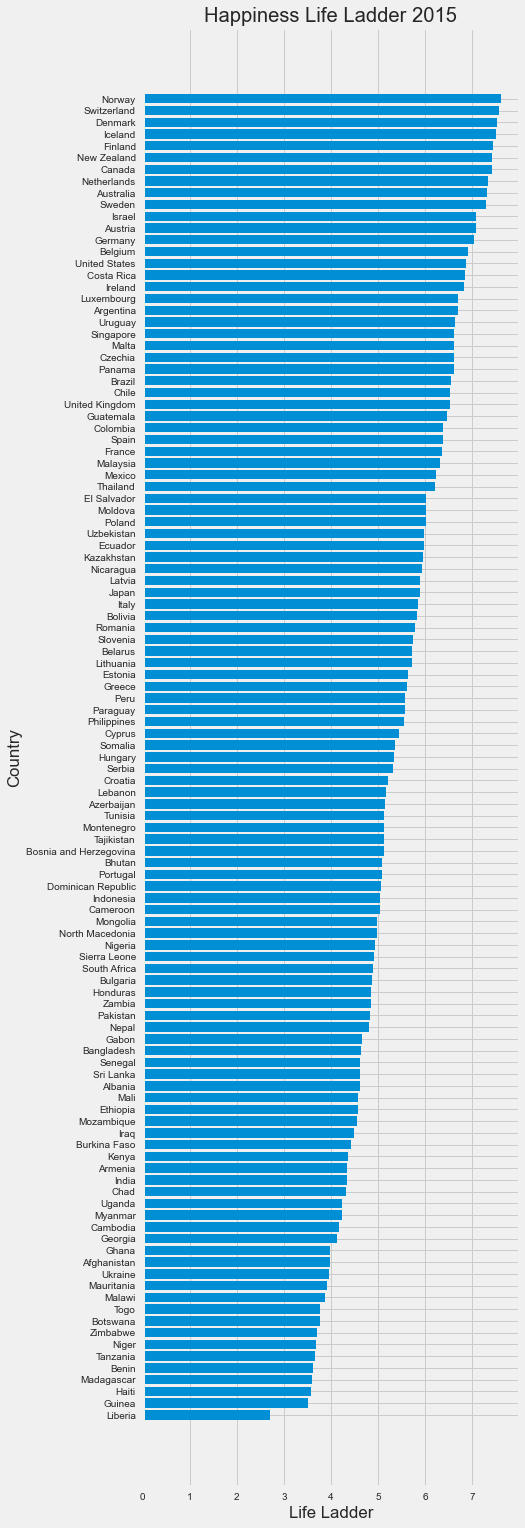

In [26]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (6, 25))

subset2015all = subset2015all.sort_values(by = 'Life Ladder')

ax.barh(subset2015all['Country'], subset2015all['Life Ladder'], align = 'center')

ax.set(xlabel = 'Life Ladder', ylabel = 'Country',
       title = 'Happiness Life Ladder 2015');

### Example of bad graph

- There is no header
- There is no x or y axis label
- The country names on the x axis are all running together; this can be fixed by rotating the axis label

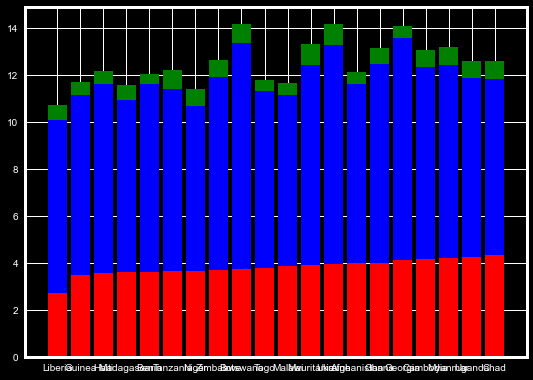

In [27]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (8, 6))

x = subset2015b['Country']
y1 = subset2015b['Life Ladder']
y2 = subset2015b['Log GDP']
y3 = subset2015b['Social support']

plt.bar(x, y1, color = 'r');
plt.bar(x, y2, bottom = y1, color = 'b');
plt.bar(x, y3, bottom = y1+y2, color = 'g');


### Horizontal stacked barchart

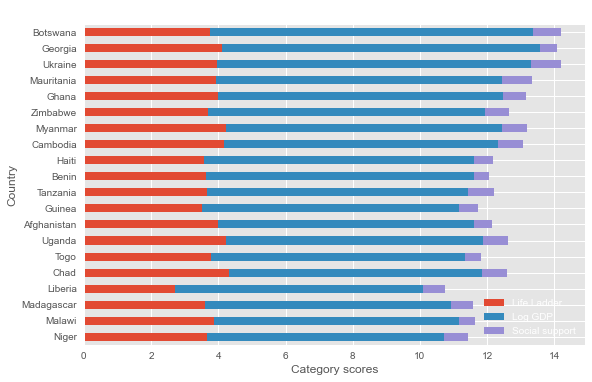

In [28]:
plt.style.use('ggplot')
subset2015sorted = subset2015b.sort_values(by = 'Log GDP', ascending = True)
subset2015sorted.plot(x = 'Country', kind = 'barh', stacked = True, title = '2015 Happiness')
plt.xlabel('Category scores');
plt.show();

### Plotting with three variables

The plotly bubble chart below shows `Life Ladder`, `Life Expectancy` and `Population`. This uses the y-axis, x-axis and the size of the circle represents the size of the population. The purpose of this plot is to visually inspect the countries selected in regards to three variables selected.

Hover over each circle to see the three values plotted for that country.

__[Bubble Charts](https://plotly.com/python/bubble-charts/)__

In [29]:
# set theme back to default
sns.set_theme()

# bubble chart
fig = px.scatter(b2015, x = "Life Expectancy", y = "Life Ladder", color = 'Country', 
                 size = 'Population', size_max = 60, text = 'Country',
        title='Happiness and Population in 2015', 
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_layout(xaxis_title = 'Life Expectancy',
                 yaxis_title = 'Life Ladder');
fig.show();

<div class="alert alert-block alert-success"><b>Problem 7 (6 pts.)</b>: 
    
- Use only 2019 data.
- From the 2019 data, select any 10 countries to create a plotly bubble chart.  
- Also select any three fields for the chart.  Keep in mind that the size of the bubble helps to provide insight to the chart; consider this when choosing which variable to represent the bubble.
- Make sure your plot has x axis labels, y axis labels and a title.
</div>

In [55]:
# TODO: Create a subset of 10 countries using only 2019 data

year2019 = merged[merged['Year'] == '2019']
df_2019_sorted = year2019.sort_values(by = 'Corruption', ascending = True)
df_2019_ten_countries = df_2019_sorted.iloc[[1, 5, 10, 14, 25, 61, 73, 103, 109, 111]]


Country  Year  Life Ladder    Log GDP  Social support  \
451                  Rwanda  2019     3.268152   7.708643        0.489458   
497                  Sweden  2019     7.398093  10.875224        0.933645   
304              Luxembourg  2019     7.404016  11.665803        0.912105   
34               Azerbaijan  2019     5.173389   9.577899        0.886756   
388               Nicaragua  2019     6.112545   8.603677        0.873864   
276                   Kenya  2019     4.618850   8.401282        0.675932   
565                Zimbabwe  2019     2.693523   8.196998        0.759162   
9                   Albania  2019     4.995318   9.521978        0.686365   
80                 Bulgaria  2019     5.108438  10.054743        0.948204   
65   Bosnia and Herzegovina  2019     6.015522   9.608901        0.873142   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
451        60.200001        0.868999    0.064353    0.167971         0.716731   
497        71.900002        0.941515    0.088857    0.250088         0.774585   
304        71.599998        0.930321   -0.049700    0.389598         0.741738   
34         63.599998        0.854249   -0.215777    0.457261         0.576897   
388        65.500000        0.882678    0.028151    0.621982         0.790255   
276        57.700001        0.817757    0.307747    0.794370         0.727641   
565        53.099998        0.631908   -0.081540    0.830652         0.658434   
9          69.099998        0.777351   -0.099058    0.914284         0.548189   
80         66.300003        0.821930   -0.110997    0.942806         0.576583   
65         67.199997        0.721563    0.077898    0.962908         0.544666   

     Negative affect  Government confidence  Population  
451         0.417668               0.985845    12626938  
497         0.202000               0.513282    10278887  
304         0.211640               0.780171      620001  
34          0.163920               0.857845    10024283  
388         0.337013               0.514430     6545503  
276         0.250687               0.683856    52573967  
565         0.235354               0.456455    14645473  
9           0.273827               0.336628     2854191  
80          0.199888               0.268382     6975761  
65          0.238069               0.167971     3300998

<div class="alert alert-block alert-success"><b>Problem 7 continued:</b> Create a bubble chart.</div>

In [56]:
# TODO: Create bubble chart

fig = px.scatter(df_2019_ten_countries, x = "Choice Freedom", y = "Government confidence", color = 'Country', 
                 size = 'Corruption', size_max = 60, text = 'Country',
        title='Choice Freedom, Government Confidence, and Corruption in 2019', 
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_layout(xaxis_title = 'Choice Freedom',
                 yaxis_title = 'Government Confidence');
fig.show();

<div class="alert alert-block alert-success"><b>Problem 8 (3 pts.)</b>:
    
- Explain in a Markdown cell why you chose the 10 countries that you did. 
- Explain why you chose the three variables you did. 
- How would you interpret the chart?
</div>

I chose the ten countries in the bubble chart above based on a handful of factors.  First, I wanted to select countries with a wide range in values for the variable that would determine bubble size, which was corruption.  Accordingly, I first sorted the dataset with 2019 data by corruption value adn then selected indices across a broad range from the dataset.  However, the resulting chart included many overlapping circles (which made the chart difficult to read) and many circles of similar sizes (which made the chart not as easy to interpret quickly).  Accordingly, I adjusted the indices of the selected dataframe rows until I was able to generate a chart with mostly non-overlapping circles and with circles of clearly different sizes.

The reason that I selected choice freedom, government confidence, and corruption for this bubble chart was because I was interested in analyzing the relationship between the three factors from the dataset over which governments likely have the most control.  In a sense, I thought that this analysis might be interesting if it revealed relationships between choice freedom, government confidence, and corruption, since findings might reveal implications for public policy.

I would interpret the chart above as displaying evidence of relationships between all three variables.  The country governments with higher ratings for corruption (as conveyed in the bubble sizes) also seem to provide their citizens with relatively less choice freedom and seem to elicit relatively low confidence from the public.  In contrast, countries with governments that are less corrupt seem to also have governments that provide greater choice freedom and elicit more public confidence.

### Adding the Continent as a new field

Very often when you start working with data, some insight may appear that was not part of your original questions. In this case as we look at the top 20 countries based on `Life Ladder`, there are quite a few from Europe. Could the level of happiness vary by Continent?

To add a new `Continent`field to our data, we will use a new library, `pycountry_convert`, along with functions, `map` and a data dictionary.



In [57]:
# pip install pycountry-convert

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681895 sha256=365ba4348eb939750f92d3d4b8f96d8978df48469c7248ff87b9bcb257e25cad
  Stored in directory: c:\users\steve\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [58]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

### Three step process to get the Continent per Country

1. First we will use the Country to get a two character country code
2. Next we will use the two character country code to get the continent code
3. Then we create continent names using `map` and a data dictionary for ease of readability when using in visuals

Note that without the availability of the `pycountry_convert` library, we would have had to create our own translation of `Country` to `Continent` - and that would have been a lot of coding!

### Step 1: two character country code

In [59]:
# function to use the country to get a two character country code
def country_code(country):
    try:
        #print(country)
        c_code = country_name_to_country_alpha2(country)
    except:
        print('Not in lookup: ', country)
    return(c_code)

In [60]:
# call function and save country code into our dataframe
merged['Country_code'] = merged['Country'].map(country_code)
merged.sample(5)

Country  Year  Life Ladder    Log GDP  Social support  \
323        Malta  2015     6.613394  10.592755        0.918765   
302   Luxembourg  2017     7.061381  11.652564        0.905436   
155  El Salvador  2018     6.241199   9.061340        0.820300   
530       Uganda  2018     4.321715   7.661429        0.739841   
221     Honduras  2018     5.908424   8.644771        0.827067   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
323        71.300003        0.912178    0.342719    0.663886         0.640534   
302        71.550003        0.902822    0.039377    0.330174         0.725732   
155        64.550003        0.863335   -0.096213    0.800700         0.817010   
530        57.724998        0.728513    0.079168    0.856106         0.686664   
221        62.575001        0.872162    0.098559    0.803565         0.821862   

     Negative affect  Government confidence  Population Country_code  
323         0.355041               0.734931      445053           MT  
302         0.184467               0.738922      596336           LU  
155         0.269586               0.368899     6420740           SV  
530         0.390319               0.503853    42729032           UG  
221         0.287358               0.398914     9587523           HN

### Step 2: two character continent code

In [61]:
# function to use two character country code to get the continent code
def continent(c_code):
    try:
        cont = country_alpha2_to_continent_code(c_code)
    except:
        print('Not in lookup: ', c_code)
        cont = 'None'
    return(cont)

In [62]:
# call function and store into our dataframe
merged['Continent_code'] = merged['Country_code'].map(continent)
merged.sample(5)

Country  Year  Life Ladder    Log GDP  Social support  \
278       Latvia  2016     5.940446  10.222275        0.917074   
448       Rwanda  2016     3.332990   7.575854        0.665131   
152  El Salvador  2015     6.018496   9.004954        0.790755   
2    Afghanistan  2017     2.661718   7.629684        0.490880   
214        Haiti  2015     3.569762   8.039913        0.564320   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
278        65.900002        0.685299   -0.159189    0.867640         0.583289   
448        59.224998        0.910736    0.025594    0.158601         0.714600   
152        63.500000        0.733356   -0.157061    0.804544         0.816157   
2          53.250000        0.427011   -0.116068    0.954393         0.435270   
214        54.599998        0.398295    0.265668    0.777404         0.597597   

     Negative affect  Government confidence  Population Country_code  \
278         0.231384               0.315261     1959537           LV   
448         0.285384               0.993604    11668829           RW   
152         0.332647               0.306592     6325121           SV   
2           0.371326               0.261179    36296111           AF   
214         0.332540               0.297118    10695540           HT   

    Continent_code  
278             EU  
448             AF  
152             NA  
2               AS  
214             NA

In [63]:
# look at counts per continent
merged['Continent_code'].value_counts()

EU    182
AF    156
AS    117
NA     57
SA     44
OC     10
Name: Continent_code, dtype: int64

### Step 3: translate two character continent code to continent name

In [64]:
# translate continent code to continent label
contMap = {'EU':'Europe',
            'AF':'Africa',
            'AS':'Asia',
            'NA':'North America',
            'SA':'South America',
            'OC':'Oceana'}
merged['Continent'] = merged['Continent_code'].map(contMap)

In [65]:
# double check mapping of names
merged['Continent'].value_counts()

Europe           182
Africa           156
Asia             117
North America     57
South America     44
Oceana            10
Name: Continent, dtype: int64

### Pandas groupby to get mean

Below shows the mean values for each Happiness measure based on the continent.

In [66]:
merged.groupby('Continent').mean(numeric_only = True)

Life Ladder    Log GDP  Social support  Life Expectancy  \
Continent                                                                
Africa            4.341149   8.104643        0.696419        55.270696   
Asia              5.198648   9.329025        0.785495        64.200641   
Europe            6.280222  10.428544        0.895217        69.060303   
North America     6.181226   9.572108        0.843899        65.164035   
Oceana            7.277362  10.718973        0.949862        70.400000   
South America     6.092384   9.627538        0.869582        67.113636   

               Choice Freedom  Generosity  Corruption  Positive affect  \
Continent                                                                
Africa               0.730466   -0.011639    0.781105         0.654864   
Asia                 0.784404    0.063934    0.735630         0.612498   
Europe               0.790161   -0.028179    0.674871         0.644895   
North America        0.826778   -0.004400    0.742341         0.767733   
Oceana               0.926028    0.229548    0.312776         0.753047   
South America        0.831789   -0.097008    0.809598         0.758493   

               Negative affect  Government confidence    Population  
Continent                                                            
Africa                0.328178               0.595115  2.648490e+07  
Asia                  0.287344               0.590419  1.092152e+08  
Europe                0.243844               0.415891  1.621403e+07  
North America         0.283242               0.404504  4.861473e+07  
Oceana                0.195882               0.543951  1.469741e+07  
South America         0.319523               0.321939  4.404396e+07

<div class="alert alert-block alert-success"><b>Problem 9 (3 pts.)</b>:
    
In Problem 1 you created a Seaborn pairplot. Now you can use the Continent field to add color to pairplots to gain further insights into this data.  
    
1. Use the full data in the <i><u>merged</u></i> dataframe.
2. Select 3 to 6 variables to create the pairplot with color.
3. Display the pairplot.   
</div>

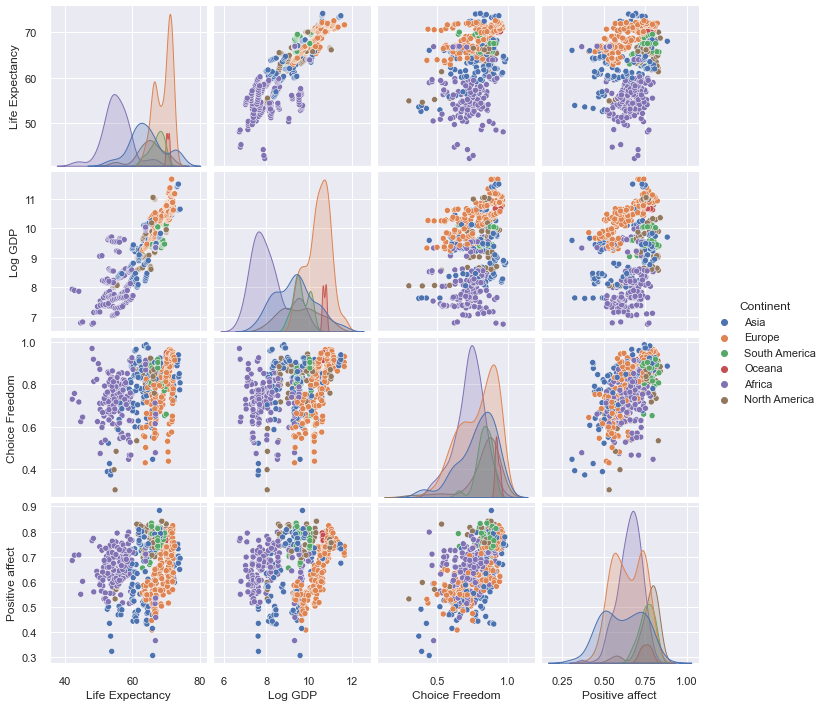

In [73]:
# TODO: Create seaborn pairplots with color based on the instructions above
question_9_columns = ['Life Expectancy', 'Log GDP', 'Choice Freedom', 'Positive affect', 'Continent']
sns.pairplot(merged[question_9_columns], hue = "Continent")

<div class="alert alert-block alert-success"><b>Problem 10 (1 pt.)</b>:
    
In a Markdown cell, explain what the color in the Seaborn pairplot shows.
    
</div>

By indicating the continent associated with each datapoint, the color of the points in the Seaborn pairplot above adds a layer of detail to the pairplots that was previously unrevealed during the creation of the pairplots in question one.  For example, we can see that we have many datapoints in this dataframe associated with countries in Africa and Europe.  Meanwhile, we have very few datapoints that correspond to countries in Oceana.  Second, we can begin to observe how for some of the scatterplots, such as the scatterplot of life expectancy and log GDP per capita, the datapoints associated with the various continents tend to cluster in different areas on the graph.

### Write out your final data

Module 5 and Module 6 homework code can be used as examples for your own EDA phase 1 and phase 2 homework.  After each phase you should be writing out your data so that it can be read into the next phase. After EDA 2, you will be writing an Executive Summary in Jupyter Notebook where you should do no data cleaning, but simply read in your final file and provide your analysis.

In [74]:
merged.to_csv('Happiness_final.csv', header = True, index = False)

### This section below is not part of the homework this week, but is extra sample code for your reference.  
    
The code shows the following:

1. Plotting by year on x-axis to show change over time
2. Ranking of data and using the ranks to group the data into bins
    


### Plotting over time

We will take the 10 largest countries in regard to `Population` in 2015. Notice that we are using `index` and `.loc` to get all columns of data and storing this into a new dataframe called `largest`.

In [75]:
index = year2015['Population'].nlargest(10).index
index
largest = merged.loc[index]
largest 

Int64Index([231, 542, 236, 71, 409, 394, 35, 262, 337, 428], dtype='int64')

Country  Year  Life Ladder    Log GDP  Social support  \
231          India  2015     4.342079   8.606009        0.610133   
542  United States  2015     6.863947  10.977470        0.903571   
236      Indonesia  2015     5.042800   9.225190        0.809478   
71          Brazil  2015     6.546897   9.620074        0.906693   
409       Pakistan  2015     4.823195   8.361321        0.561720   
394        Nigeria  2015     4.932915   8.615186        0.811648   
35      Bangladesh  2015     4.633474   8.216118        0.601468   
262          Japan  2015     5.879684  10.606649        0.922657   
337         Mexico  2015     6.236287   9.866248        0.760614   
428    Philippines  2015     5.547489   8.895648        0.853589   

     Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
231        59.099998        0.777225   -0.005791    0.776435         0.657201   
542        66.599998        0.848753    0.216716    0.697543         0.768671   
236        62.299999        0.779418    0.470236    0.945967         0.796219   
71         64.699997        0.798935   -0.017049    0.771339         0.687064   
409        55.799999        0.586546    0.085119    0.716641         0.469452   
394        53.099998        0.680470   -0.035880    0.926109         0.714879   
35         63.799999        0.814796   -0.068596    0.720601         0.543084   
262        73.599998        0.831694   -0.158819    0.654443         0.702269   
337        65.800003        0.719466   -0.153377    0.707972         0.706145   
428        61.900002        0.911534   -0.051945    0.755192         0.796322   

     Negative affect  Government confidence  Population Country_code  \
231         0.321829               0.694717  1310152392           IN   
542         0.274688               0.346936   320738994           US   
236         0.274292               0.645185   258383257           ID   
71          0.324699               0.198535   204471759           BR   
409         0.328647               0.459588   199426953           PK   
394         0.251190               0.410358   181137454           NG   
35          0.225754               0.760612   156256287           BD   
262         0.176409               0.352867   127141000           JP   
337         0.237188               0.256193   121858251           MX   
428         0.350588               0.668414   102113206           PH   

    Continent_code      Continent  
231             AS           Asia  
542             NA  North America  
236             AS           Asia  
71              SA  South America  
409             AS           Asia  
394             AF         Africa  
35              AS           Asia  
262             AS           Asia  
337             NA  North America  
428             AS           Asia

Since we plan to plot for all the years in the data, we need to get all the data for our top ten countries from the `merged` dataframe. 

In [76]:
comparelist = list(largest['Country'])
comparelist
compare = merged[merged['Country'].isin(comparelist)]

['India',
 'United States',
 'Indonesia',
 'Brazil',
 'Pakistan',
 'Nigeria',
 'Bangladesh',
 'Japan',
 'Mexico',
 'Philippines']

This plot shows the choice of freedom happiness category for our ten countries from 2015 to 2019.

In [77]:
fig = px.line(compare, x = "Year", y = "Choice Freedom", color='Country', 
        title='Freedom of Choice ', color_discrete_sequence = px.colors.qualitative.Bold)

fig.update_layout(height = 600, xaxis_title = 'Year')

### Ranking of data

There will be times when you will want to look at sections of your data to see if there are differences between groupings. One way to do this is with ranking of data and the creating groups. This is different from clustering because you are chosing the ranking variable and the cut offs for the groups.

 __[Dat Frame Rank](https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rank.html)__

In [78]:
# create a copy of 2015 data
year2015copy = year2015.copy()

When you look at five sample rows of data after the ranking, you can see a new column called `popRank` that has given the most populous country in 2015 a value of 1 and the least populous a value of 113.

In [79]:
year2015copy = year2015copy.reset_index()
year2015copy['popRank'] = year2015copy['Population'].rank(ascending = False)
year2015copy.sample(5)

index   Country  Year  Life Ladder    Log GDP  Social support  \
40    199    Greece  2015     5.622519  10.249216        0.834825   
69    347  Mongolia  2015     4.982720   9.306533        0.905524   
82    414    Panama  2015     6.605550  10.255235        0.882615   
1       5   Albania  2015     4.606651   9.382482        0.639356   
16     76  Bulgaria  2015     4.865401   9.902899        0.907517   

    Life Expectancy  Choice Freedom  Generosity  Corruption  Positive affect  \
40        70.400002        0.531736   -0.273338    0.823960         0.636590   
69        59.900002        0.685511    0.172015    0.900218         0.532773   
82        68.300003        0.846669   -0.009005    0.809943         0.777305   
1         69.000000        0.703851   -0.080609    0.884793         0.579072   
16        65.900002        0.636818   -0.202962    0.941280         0.555952   

    Negative affect  Government confidence  Population  popRank  
40         0.277413               0.437319    10820883     60.0  
69         0.207653               0.226755     2998433     97.0  
82         0.263826               0.375585     3968490     93.0  
1          0.350427               0.506978     2880703    100.0  
16         0.214224               0.249677     7177991     76.0

When creating categories, the number of categories and the breakdown of each category will depend on the data.  For example purposes, this data will be broken into three categories with the splits based on the `popRank` column.

In [80]:
from pandas import Categorical 
# create categorical variable for rankings - divide in thirds
top_cat = 37 # gives us top third of rankings based on 113 countries
low_cat = 75 # gives us bottom third of rankings

# assign a category of 1, 2, or 3 based on how ranked with teeth value
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] <= top_cat,1,2))
year2015copy['popCat'] = Categorical(np.where(year2015copy['popRank'] >= low_cat,3,year2015copy['popCat']))
year2015copy['popCat'].value_counts()

3    39
1    37
2    37
Name: popCat, dtype: int64

In [81]:
temp = year2015copy[['Country','Population','popRank']]
temp.sort_values(by = ['popRank'])

Country  Population  popRank
47           India  1310152392      1.0
108  United States   320738994      2.0
48       Indonesia   258383257      3.0
15          Brazil   204471759      4.0
81        Pakistan   199426953      5.0
..             ...         ...      ...
11          Bhutan      727885    109.0
70      Montenegro      622159    110.0
60      Luxembourg      569604    111.0
65           Malta      445053    112.0
46         Iceland      330815    113.0

[113 rows x 3 columns]

### Results of Rankings and Categorization
Using `groupby` we can see the mean values for each category.

Keep in mind that Group 1 is the most populous and Group 3 is the least populous.
1. Interesting that almost all of the categories are better for group 3 - or the least populous. 
2. And then Group 1, the most populous, has the next best set of scores.
3. The worst group in almost every category is group 2!


In [82]:
# how do our groupings differ?
year2015copy.groupby('popCat').mean(numeric_only = True)

index  Life Ladder   Log GDP  Social support  Life Expectancy  \
popCat                                                                       
1       307.027027     5.410703  9.241387        0.807442        63.035135   
2       263.189189     5.333634  9.096096        0.778766        61.875676   
3       270.615385     5.612790  9.797522        0.823479        65.533333   

        Choice Freedom  Generosity  Corruption  Positive affect  \
popCat                                                            
1             0.768396    0.080246    0.752726         0.679936   
2             0.757791   -0.010320    0.735873         0.677207   
3             0.753242    0.009153    0.707278         0.654233   

        Negative affect  Government confidence    Population  popRank  
popCat                                                                 
1              0.271805               0.488665  1.140240e+08     19.0  
2              0.270880               0.528884  1.345873e+07     56.0  
3              0.276783               0.433603  3.788129e+06     94.0

Even though there appear to be difference between the three categories when looking at the means, the plots below do not show any patterns.

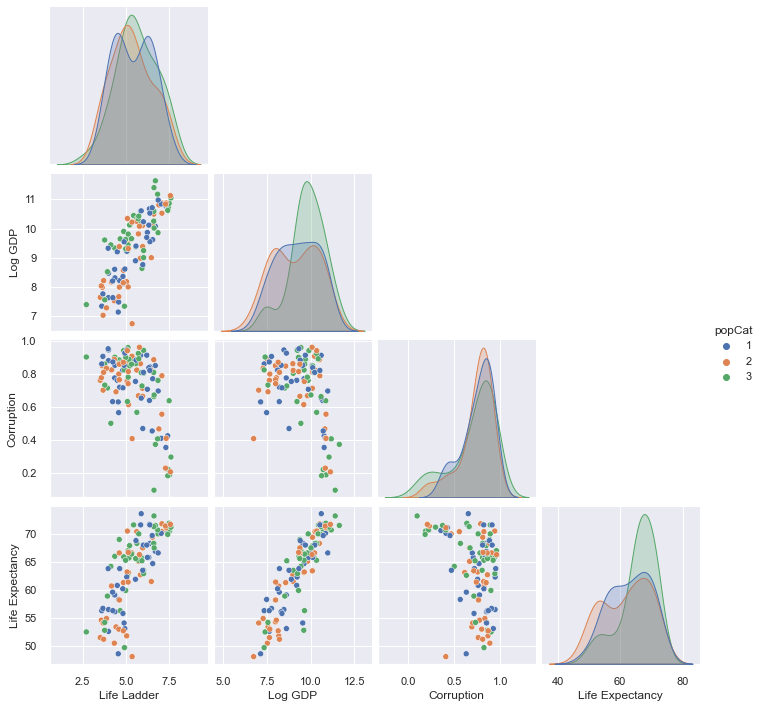

In [83]:
# pairplots on three fields
#columns = year2015copy.columns[1:5]
#columns
sns.pairplot(year2015copy, hue = 'popCat', kind = 'scatter',  corner = True, 
             vars = ['Life Ladder', 'Log GDP', 'Corruption', 'Life Expectancy'])
